# Homework 

Repeat the binary classification with Glycerophospholipids, and check which features are important. To clarify the question, you have already performed multi-class classification. You simply need to obtain AUROC and feature importances for Glycerophospholipids vs. Not_Glycerophospholipids. 

Make a single Jupyter Notebook with your name in the file name, and upload it on Canvas. Points will be given as follows:

1. How easy is it to run the code? -- 2 points
2. Is the code well-commented? -- 2 points
3. Is the AUROC graph correct? -- 2 points
4. Is the Feature Importance graph correct? -- 2 point
5. Is there an interpretation provided for feature importance -- 2 points

## 1. Setting up

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#%matplotlib notebook
%matplotlib inline

import seaborn as sns

#Read in the file
s = pd.read_csv('small_input_file.tab',sep="\t")

#Define which columns are labels and which are features
labels=s['Category']

feats=s[s.columns[5:]] #Are these the correct columns? Go back to the table where you defined s and check.
annot=s[s.columns[0:5]]

#Train machine learning model
#multi-class classifier 
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features: features
    :param target: labels
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(n_estimators=100)
    #estimators stands for the number of decision trees you want to implement
    #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    clf.fit(features, target)
    return clf



## 2. Splitting data

In [14]:
train_feats, test_feats, train_labels, test_labels  = train_test_split (feats, labels, test_size=0.2)
#Running the randomForestClassifier
trained_model = random_forest_classifier(train_feats, train_labels)

#Let's see if the trained model predicts the test features correctly. 
pred_labels=trained_model.predict(test_feats)
pred_probs=trained_model.predict_proba(test_feats)

class_names=list(set(train_labels))


## 3. Plotting the AUROC

Overall model score:  0.996268656716418
nan


/Users/zl725/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


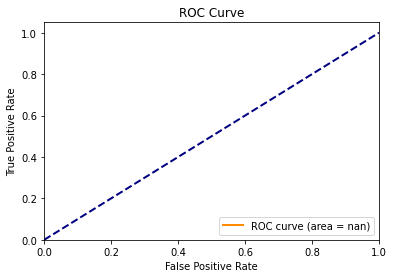

In [25]:
for name in class_names:
    if name=='Glycerolipids':
        pass
    else:
        train_labels=pd.Series(train_labels).str.replace(name,'Not_G') #replace labels in training
        test_labels=pd.Series(test_labels).str.replace(name,'Not_G') #replace labels in test

#Run Random Forest classifier on them and print the overall model score
rf = RandomForestClassifier(n_estimators=100, oob_score=True) 
trained_model2 = rf.fit(train_feats, train_labels)
model_scores2=rf.score(test_feats, test_labels)
print ("Overall model score: ", model_scores2)

#Get the Area Under the Receiver Operating Characteristic (AUC-ROC or AUROC)
y_score=trained_model2.predict_proba(test_feats)[:, 1]
# fpr, tpr, _ = roc_curve(test_labels, y_score, pos_label='Glycerolipids')
fpr, tpr, _ = roc_curve(test_labels, y_score, pos_label='Not_G')

roc_auc = auc(fpr, tpr)
print (roc_auc)

#Plot the AUROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 4. Feature importance

              importance
Afterdecmass    0.207467
NumofO          0.182657
C:O             0.148652
H:O             0.133482
NumofC          0.095467
NumofH          0.071507
Mass            0.064606
RMD             0.037738
C:P             0.012408
NumofP          0.011555
C:N             0.009083
AMD             0.008459
H:C             0.007751
NumofN          0.007518
C:S             0.001356
NumofS          0.000296


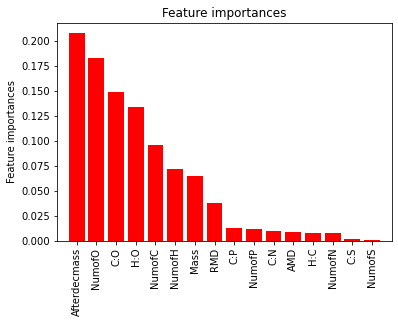

In [26]:
## Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_feats.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Print the feature ranking
print (feature_importances)

# Plot the feature importances of the forest
figcolumns=feature_importances.index.values
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_feats.shape[1]), feature_importances.importance,
       color="r", align="center")
plt.ylabel("Feature importances")
plt.xticks(range(train_feats.shape[1]), figcolumns, rotation='vertical')
plt.xlim([-1, train_feats.shape[1]])
plt.show()